### One-sample proportion z-test

In [3]:
import pandas as pd
coasters = pd.read_csv("Coasters_2015.csv")

In [4]:
# Take a look at the data
coasters.head()

,Name,Park,Track,Speed,Height,Drop,Length,Duration,Inversions
0,Top Thrill Dragster,Cedar Point,Steel,120.0,420.0,400.0,2800.0,NaN,0
1,Superman The Escap,Six Flags Magic Mountain,Steel,100.0,415.0,328.1,1235.0,NaN,0
2,Millennium Force,Cedar Point,Steel,93.0,310.0,300.0,6595.0,165.0,0
3,Goliath,Six Flags Magic Mountain,Steel,85.0,235.0,255.0,4500.0,180.0,0
4,Titan,Six Flags Over Texas,Steel,85.0,245.0,255.0,5312.0,210.0,0


In [68]:
# Count how many rollercoasters have a steel track v/s how many have a wood track
coasters["Track"].value_counts()

Steel    212
Wood      29
Name: Track, dtype: int64

In [7]:
# Proportion of steel rollercoasters
steel_p = 212 / (212+29)

In [8]:
print("The proportion of steel coasters in 2015 is equal to: ", steel_p)

The proportion of steel coasters in 2015 is equal to:  0.8796680497925311


However, a rollercoasters' expert suggests that during 2022 the proportion of steel rollercoasters has changed. Her study shows that 320 out of 355 coasters have a steel track.

* h0 : p̂ = steel_p -> the proportion of steel coasters in 2022 is 0.88
* ha : p̂ ≠ steel_p -> the proportion of steel coasters in 2022 is different from 0.88

To test our null hypothesis, we will make use of proportions_ztest from statsmodels.stats.proportion.

**Arguments**
* count = # ; number of successes if Null Hypothesis is True. (total observed * hypothesized proportion)
* nobs = # ; size of observed sample
* value = # ; observed proportion
* alternative = "nameOfAlternative" ; Type of test(two-sided or one-sided)

In [11]:
# Import library
import statsmodels.stats.proportion as sm

# Store z_test and p_value
z_test , p_value = sm.proportions_ztest(count = 312 , nobs = 355, value = 0.9, alternative = "two-sided")

# Print results
print("The z test values is: ", z_test, ". The p-value is: ", p_value)

The z test values is:  -1.220011473889561 . The p-value is:  0.22246052533158622


Since the p-value is greater than 0.05 we fail to reject the null hypothesis. We do not have enough evidence to say that the proportion of steel rollercoasters in 2022 has changed sinced 2015.

### Confidence Interval for proportions

Now let's calculate our confidence interval for steel track proportion using our 2015 data. In order to do so, we will use statsmodels.stats.proportion once again.

**Arguments:**
* count = # ; number of successes
* nobs = # ; size of observed sample
* alpha = # ; the desired significance level

In [14]:
# Caclulate confidence interval and store in conf_prop
conf_prop = sm.proportion_confint(count = 212, nobs = 241, alpha = 0.05)
print(conf_prop)

(0.8385919257601463, 0.9207441738249159)


We are 95% confident that between 83% and 92% of the roller coasters in the world have a steel track.

### Confidence Interval for means

Now let's calculate our confidence interval for averaged speed using our 2015 data. In order to do so, we will use scipy.stats library.

**Arguments:**
* loc = # ; mean value from our sample
* scale = # ; standard deviation from our sample
* df = # ; degrees of freedom (n-1)
* alpha = desired significance value

In [16]:
# Import library
import scipy.stats as st

# Calculate standard deviation for speed
sd_speed = coasters["Speed"].std()

# Calculate mean for speed
mean_speed = coasters['Speed'].mean()

# Assign the t-interval values into t_speed
t_speed = st.t.interval(loc = mean_speed, scale = sd_speed,df = 240, alpha = 0.05)

# Print our results
print("The t-interval is: ", t_speed)

The t-interval is:  (54.17898635866439, 56.52225845461366)


We are 95% confident that the average speed of rollercoasters in the world will be between 54 and 56 mph.

## Inference for Linear Regression using statsmodels.api
Let's learn how to perform inference with linear regression! We will use a dataset from the world health organization.

In [18]:
# Read data set
who = pd.read_csv("world_health.csv")

In [19]:
# Take a look at the data set
who.head()

,Country,Year,Status,life_exp,adult_mort,inf_deaths,alcohol,percentage_expenditure,hepatitisb,measles,...,polio,total_expenditure,diphteria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_comp_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Is there an association between schooling and life expectancy after adjusting for relevant confounders?
* h0 : there's no association between schooling and life expectancy
* ha : there's an association between schooling and life expectancy

To plot some of the graphs for checking conditions and asummptions, we must fit our data into our linear model. We will use ols from statsmodels.formula.api for this process.

**Arguments:**
* data = dataframe
* formula = "dependent ~ independent" 

After writing our arguments, we will type .fit()

* smf.ols(data = dataframe, formula = "dependent ~ independent").fit()

In [23]:
# Import libraries
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Fit model
model1 = smf.ols(data =  who, formula = "life_exp ~ schooling").fit()

### Linearity
There are different ways of checking linearity. In order to put in practice what we've previously learned we will use a scatterplot to check if the relationship between life_exp and schooling is truly linear or not.

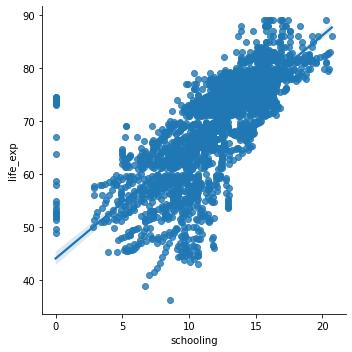

In [24]:
# Create scatterplot using lmplot from seaborn.
sns.lmplot(data = who, x = "schooling", y = "life_exp")
plt.show()

### Independence and Equal Variance
To check independence and equal variance we will use a **residual plot**, a plot we haven't showed you how to do yet. Luckily, seaborn is able to perform this plot, so we will be using that library.

**Arguments for residplot:**
* data = dataframe
* x = "indVar"
* y = "depVar"

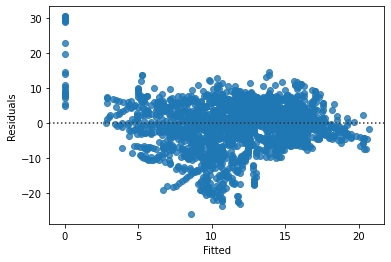

In [25]:
# Create resdiplot using seaborn
sns.residplot(data = who,x = "schooling", y = "life_exp")

# Create labels
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.show()

Awesome! we can see that the values are roughly evenly spreaded across 0, and they seem to be randomly scattered.

### Normality 
To check normality we will use qqplot from statsmodels.api.

**Arguments for qqplot:**
* data = modelName.resid 
* line = "s"

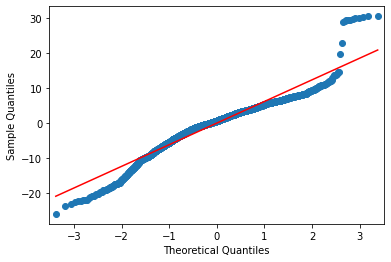

In [31]:
# Import library
import statsmodels.api as sma

# Plot the qqplot. Note that there's a semi-colon at the end, which is to avoid jupyternotebook from returning  
sma.qqplot(data = model1.resid, line="s");
plt.show()

<AxesSubplot:ylabel='Count'>

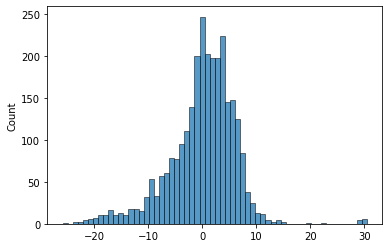

In [27]:
sns.histplot(model1.resid)

Great! our conditions have been satisfied. Let's look at the summary of the linear model.

In [434]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     3599.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:00:22   Log-Likelihood:                -8964.3
No. Observations:                2768   AIC:                         1.793e+04
Df Residuals:                    2766   BIC:                         1.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.1089      0.437    100.992      0.0

Schooling has a positive association of 2.1, with a standard error of 0.034 , with a t-ratio of 60 which gives a p-value < 0.05, corresponding to a 95% confident interval for the beta coefficient between 2.035 and 2.172.

We can reject the null hypothesis, since we have enough evidence to say that there's a positive association between schooling and life expectancy.

## Multiple Linear Regression

* h0 : there's no difference between country status in their life expectancy, when controlling for schooling
* ha : there's a difference between country status in their life expectancy, when controlling for schooling

In [476]:
model2 = smf.ols(data=who, formula='life_exp ~ schooling + C(Status)').fit()

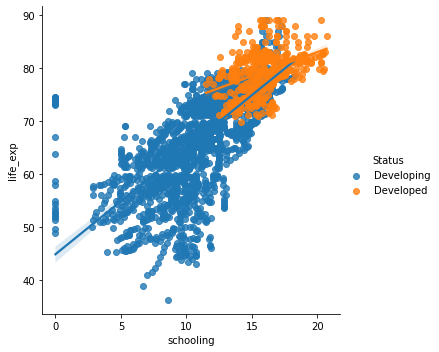

In [477]:
sns.lmplot(data = who, x = "schooling", y = "life_exp", hue = "Status")

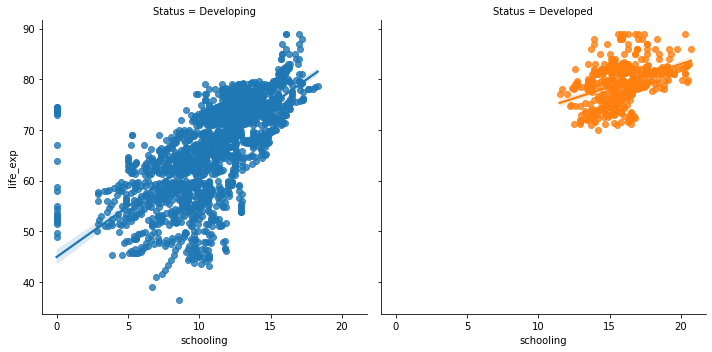

In [478]:
sns.lmplot(data = who, x = "schooling", y = "life_exp", hue = "Status", col = "Status")

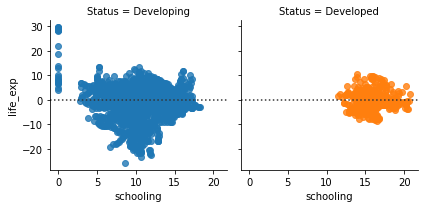

In [479]:
g = sns.FacetGrid(data = who, col = "Status", hue = "Status")
g.map(sns.residplot, "schooling", "life_exp")

In [480]:
sns.residplot?

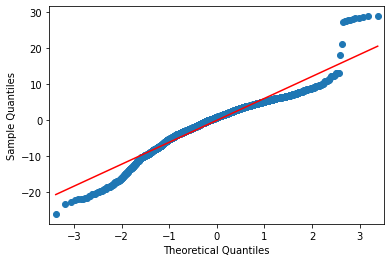

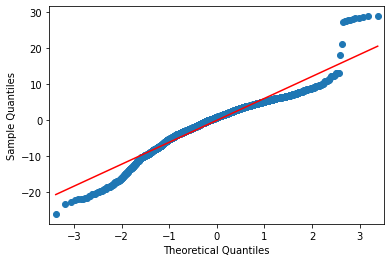

In [481]:
sma.qqplot(model2.resid, line = "s")

In [482]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     1877.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:42:31   Log-Likelihood:                -8930.6
No. Observations:                2768   AIC:                         1.787e+04
Df Residuals:                    2765   BIC:                         1.788e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Since the p-value < 0.05 we can reject the null hypothesis. Compared to developed countries, developing countries have a lower life expectancy average.

In conclusion, there's an association between schooling and life expectency when considering both developed and in development countries.

## References
* https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html
* https://research.library.gsu.edu/c.php?g=844869&p=7657842
